In [12]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

In [13]:
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd

In [7]:
ids=[]
for i in range(1,20):
    s="liked_"+str(i)
    ids.append(s)
for i in range(1,20):
    s="Not_liked_"+str(i)
    ids.append(s)


In [8]:
ids

['liked_1',
 'liked_2',
 'liked_3',
 'liked_4',
 'liked_5',
 'liked_6',
 'liked_7',
 'liked_8',
 'liked_9',
 'liked_10',
 'liked_11',
 'liked_12',
 'liked_13',
 'liked_14',
 'liked_15',
 'liked_16',
 'liked_17',
 'liked_18',
 'liked_19',
 'Not_liked_1',
 'Not_liked_2',
 'Not_liked_3',
 'Not_liked_4',
 'Not_liked_5',
 'Not_liked_6',
 'Not_liked_7',
 'Not_liked_8',
 'Not_liked_9',
 'Not_liked_10',
 'Not_liked_11',
 'Not_liked_12',
 'Not_liked_13',
 'Not_liked_14',
 'Not_liked_15',
 'Not_liked_16',
 'Not_liked_17',
 'Not_liked_18',
 'Not_liked_19']

In [25]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))

In [16]:
for i in range(19):
    print(ids[i])

liked_1
liked_2
liked_3
liked_4
liked_5
liked_6
liked_7
liked_8
liked_9
liked_10
liked_11
liked_12
liked_13
liked_14
liked_15
liked_16
liked_17
liked_18
liked_19


In [30]:
width = 350
X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('train/%s.jpg' % df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1

100%|██████████| 10222/10222 [00:43<00:00, 232.37it/s]


In [31]:
X[78]

array([[[150, 160, 170],
        [150, 160, 170],
        [151, 161, 171],
        ..., 
        [150, 159, 173],
        [150, 159, 173],
        [150, 159, 173]],

       [[150, 160, 170],
        [150, 160, 170],
        [151, 161, 171],
        ..., 
        [151, 160, 173],
        [151, 160, 173],
        [151, 160, 173]],

       [[150, 160, 170],
        [150, 160, 170],
        [151, 161, 171],
        ..., 
        [152, 161, 175],
        [152, 161, 175],
        [152, 161, 175]],

       ..., 
       [[177, 188, 196],
        [176, 187, 195],
        [175, 186, 194],
        ..., 
        [162, 172, 182],
        [162, 172, 182],
        [162, 172, 182]],

       [[177, 188, 196],
        [176, 187, 195],
        [175, 186, 194],
        ..., 
        [162, 172, 182],
        [162, 172, 182],
        [162, 172, 182]],

       [[177, 188, 196],
        [176, 187, 195],
        [175, 186, 194],
        ..., 
        [162, 172, 182],
        [162, 172, 182],
        [162, 172,

In [23]:
import random
import matplotlib.pyplot as plt

cv2.imread('/Users/ashokvardhan/Downloads/Projects/Dress/%s.jpg' % ids[i] )

TypeError: 'module' object is not callable

In [ ]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)

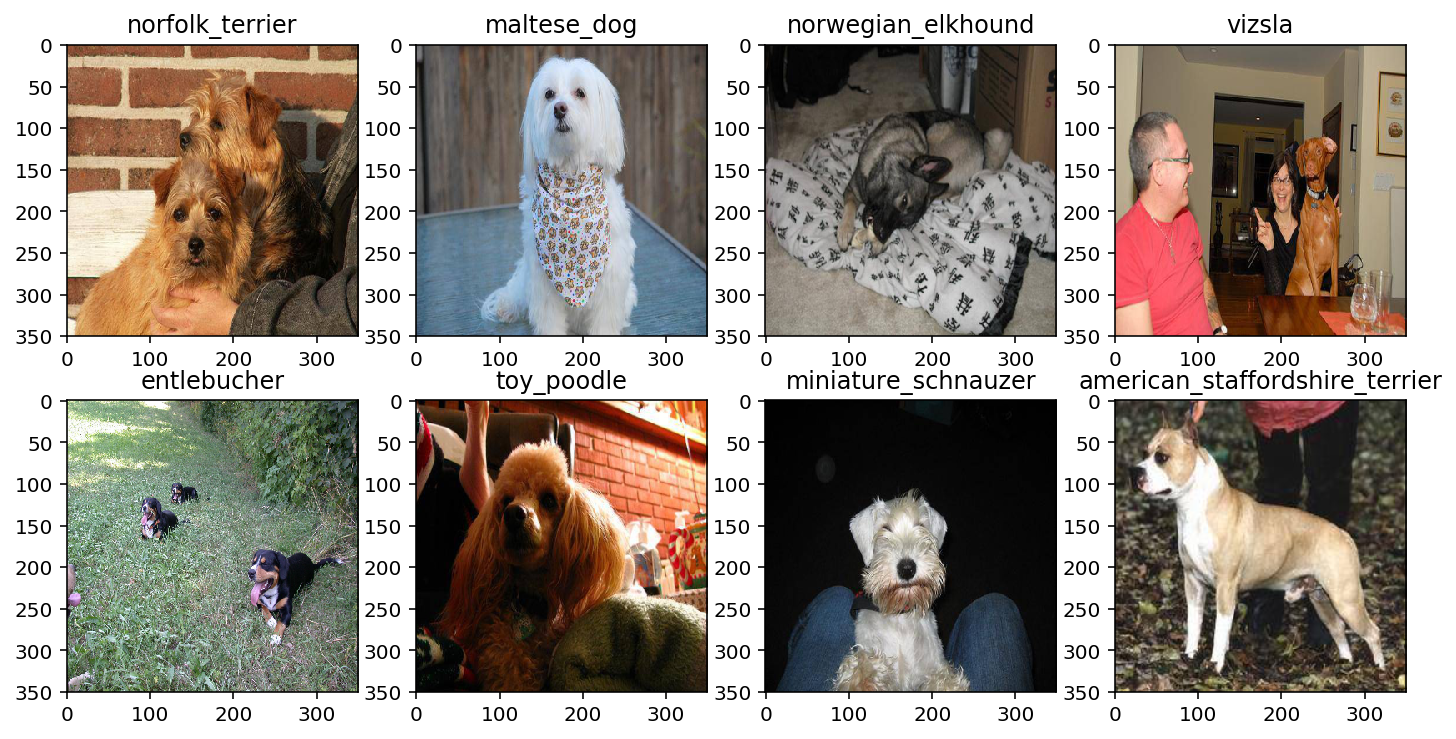

In [8]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title(num_to_class[y[random_index].argmax()])

In [9]:
len(y[0])

120

In [10]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

def one_hot_encode(np_array):
    return (np.arange(10) == np_array[:,None]).astype(np.float32)

def reformat_data(dataset, labels, image_width, image_height, image_depth):
    np_dataset_ = np.array([np.array(image_data).reshape(image_width, image_height, image_depth) for image_data in dataset])
    np_labels_ = one_hot_encode(np.array(labels, dtype=np.float32))
    np_dataset, np_labels = randomize(np_dataset_, np_labels_)
    return np_dataset, np_labels

def flatten_tf_array(array):
    shape = array.get_shape().as_list()
    return tf.reshape(array, [shape[0], shape[1] * shape[2] * shape[3]])

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

In [3]:
import pickle
import numpy as np
cifar10_folder = 'cifar10/'
train_datasets = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', ]
test_dataset = ['test_batch']
c10_image_height = 32
c10_image_width = 32
c10_image_depth = 3
c10_num_labels = 10
c10_image_size=32

with open(cifar10_folder + test_dataset[0], 'rb') as f0:
    c10_test_dict = pickle.load(f0, encoding='bytes')

c10_test_dataset, c10_test_labels = c10_test_dict[b'data'], c10_test_dict[b'labels']
test_dataset_cifar10, test_labels_cifar10 = reformat_data(c10_test_dataset, c10_test_labels, c10_image_size, c10_image_size, c10_image_depth)

c10_train_dataset, c10_train_labels = [], []
for train_dataset in train_datasets:
    with open(cifar10_folder + train_dataset, 'rb') as f0:
        c10_train_dict = pickle.load(f0, encoding='bytes')
        c10_train_dataset_, c10_train_labels_ = c10_train_dict[b'data'], c10_train_dict[b'labels']
 
        c10_train_dataset.append(c10_train_dataset_)
        c10_train_labels += c10_train_labels_

c10_train_dataset = np.concatenate(c10_train_dataset, axis=0)
train_dataset_cifar10, train_labels_cifar10 = reformat_data(c10_train_dataset, c10_train_labels, c10_image_size, c10_image_size, c10_image_depth)
del c10_train_dataset
del c10_train_labels

print("The training set contains the following labels: {}".format(np.unique(c10_train_dict[b'labels'])))
print('Training set shape', train_dataset_cifar10.shape, train_labels_cifar10.shape)
print('Test set shape', test_dataset_cifar10.shape, test_labels_cifar10.shape)

The training set contains the following labels: [0 1 2 3 4 5 6 7 8 9]
Training set shape (50000, 32, 32, 3) (50000, 10)
Test set shape (10000, 32, 32, 3) (10000, 10)


In [27]:
train_dataset_cifar10=X[:10001,:,:,:]
train_labels_cifar10=y[:10001,:]
test_dataset_cifar10=X[10001:,:,:,:]
test_labels_cifar10=y[10001:,:]

In [26]:
train_dataset_cifar10.shape

(10000, 350, 350, 3)

In [24]:
y.shape

(10222, 120)

In [23]:
X.shape

(10222, 350, 350, 3)

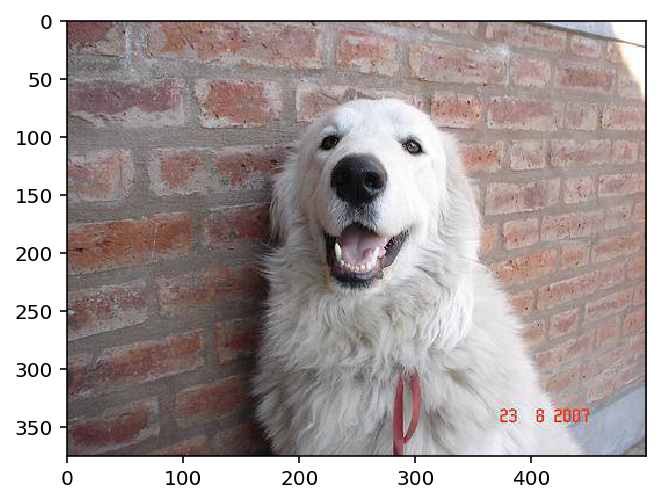

In [19]:
m = cv2.imread('train/0a0c223352985ec154fd604d7ddceabd.jpg')
m1=cv2.imread('0a0c223352985ec154fd604d7ddceabd1.jpg')
plt.imshow(m[:,:,::-1])

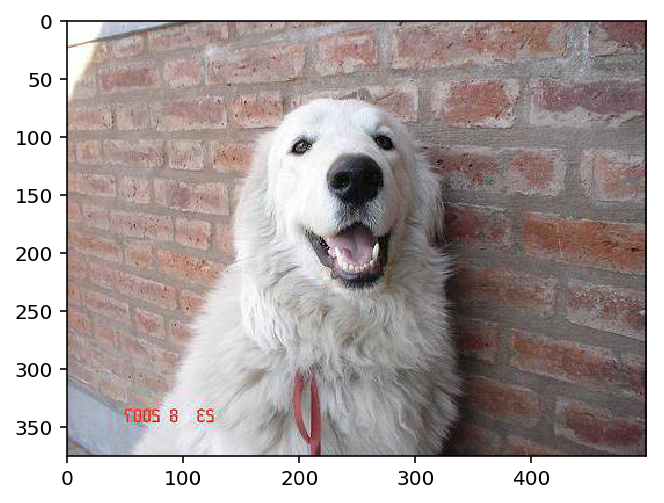

In [20]:
plt.imshow(m1[:,:,::-1])

In [ ]:
X[10222]

In [22]:
from PIL import Image
def flip_image(image_path, saved_location):
    """
    Flip or mirror the image
    @param image_path: The path to the image to edit
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open(image_path)
    rotated_image = image_obj.transpose(Image.FLIP_TOP_BOTTOM)
    rotated_image.save(saved_location)
    rotated_image.show()
if __name__ == '__main__':
    image = 'train/0a0c223352985ec154fd604d7ddceabd.jpg'
    flip_image(image, '0a0c223352985ec154fd604d7ddceabd2.jpg')

In [4]:
train_dataset_cifar10.shape

(50000, 32, 32, 3)

In [28]:
import tensorflow as tf
image_width = c10_image_width
image_height = c10_image_height
image_depth = c10_image_depth
num_labels = c10_num_labels 

#the dataset
train_dataset = train_dataset_cifar10
train_labels = train_labels_cifar10 
test_dataset = test_dataset_cifar10
test_labels = test_labels_cifar10 

#number of iterations and learning rate
num_steps = 100000
display_step = 10000
#learning_rate = 0.5
batch_size = 32
graph = tf.Graph()
with graph.as_default():
    #1) First we put the input data in a tensorflow friendly form. 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_width, image_height, image_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape = (batch_size, num_labels))
    tf_test_dataset = tf.constant(test_dataset, tf.float32)
  
    #2) Then, the weight matrices and bias vectors are initialized
    #as a default, tf.truncated_normal() is used for the weight matrix and tf.zeros() is used for the bias vector.
    weights = tf.Variable(tf.truncated_normal([image_width * image_height * image_depth, num_labels]), tf.float32)
    bias = tf.Variable(tf.zeros([num_labels]), tf.float32)
  
    #3) define the model:
    #A one layered fccd simply consists of a matrix multiplication
    def model(data, weights, bias):
        return tf.matmul(flatten_tf_array(data), weights) + bias

    logits = model(tf_train_dataset, weights, bias)

    #4) calculate the loss, which will be used in the optimization of the weights
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))

    #5) Choose an optimizer. Many are available.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    #6) The predicted values for the images in the train dataset and test dataset are assigned to the variables train_prediction and test_prediction. 
    #It is only necessary if you want to know the accuracy by comparing it with the actual values. 
    train_prediction = tf.nn.softmax(logits)
    test_prediction = tf.nn.softmax(model(tf_test_dataset, weights, bias))


with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        train_accuracy = accuracy(predictions, batch_labels)

        if (step % display_step == 0):
            #train_accuracy = accuracy(predictions, train_labels[:, :])
            test_accuracy = accuracy(test_prediction.eval(), test_labels)
            message = "step {:04d} : loss is {:06.2f}, accuracy on training set {:02.2f} %, accuracy on test set {:02.2f} %".format(step, l, train_accuracy, test_accuracy)
            print(message)

NameError: name 'c10_image_width' is not defined

In [ ]:
import tensorflow as tf
image_width = 350
image_height = 350
image_depth = 3
num_labels = 120 

#the dataset
train_dataset = train_dataset_cifar10
train_labels = train_labels_cifar10 
test_dataset = test_dataset_cifar10
test_labels = test_labels_cifar10 

#number of iterations and learning rate
num_steps = 10000
display_step = 10
learning_rate = 0.01
batch_size = 32
graph = tf.Graph()
with graph.as_default():
    #1) First we put the input data in a tensorflow friendly form. 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_width, image_height, image_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape = (batch_size, num_labels))
    tf_test_dataset = tf.constant(test_dataset, tf.float32)
  
    #2) Then, the weight matrices and bias vectors are initialized
    #as a default, tf.truncated_normal() is used for the weight matrix and tf.zeros() is used for the bias vector.
    weights = tf.Variable(tf.truncated_normal([image_width * image_height * image_depth, num_labels]), tf.float32)
    bias = tf.Variable(tf.zeros([num_labels]), tf.float32)
  
    #3) define the model:
    #A one layered fccd simply consists of a matrix multiplication
    def model(data, weights, bias):
        return tf.matmul(flatten_tf_array(data), weights) + bias

    logits = model(tf_train_dataset, weights, bias)

    #4) calculate the loss, which will be used in the optimization of the weights
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))

    #5) Choose an optimizer. Many are available.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    #6) The predicted values for the images in the train dataset and test dataset are assigned to the variables train_prediction and test_prediction. 
    #It is only necessary if you want to know the accuracy by comparing it with the actual values. 
    train_prediction = tf.nn.softmax(logits)
    test_prediction = tf.nn.softmax(model(tf_test_dataset, weights, bias))


with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        train_accuracy = accuracy(predictions, batch_labels)

        if (step % display_step == 0):
            #train_accuracy = accuracy(predictions, train_labels[:, :])
            test_accuracy = accuracy(test_prediction.eval(), test_labels)
            message = "step {:04d} : loss is {:06.2f}, accuracy on training set {:02.2f} %, accuracy on test set {:02.2f} %".format(step, l, train_accuracy, test_accuracy)
            print(message)

Initialized
step 0000 : loss is 157332.66, accuracy on training set 0.00 %, accuracy on test set 0.45 %
step 0010 : loss is 5014363.00, accuracy on training set 0.00 %, accuracy on test set 0.90 %
step 0020 : loss is 18617348.00, accuracy on training set 0.00 %, accuracy on test set 0.45 %
step 0030 : loss is 11504188.00, accuracy on training set 0.00 %, accuracy on test set 1.81 %
step 0040 : loss is 14684179.00, accuracy on training set 0.00 %, accuracy on test set 0.45 %
step 0050 : loss is 14328450.00, accuracy on training set 3.12 %, accuracy on test set 0.90 %
step 0060 : loss is 21347024.00, accuracy on training set 0.00 %, accuracy on test set 2.26 %
step 0070 : loss is 21281538.00, accuracy on training set 0.00 %, accuracy on test set 0.90 %
step 0080 : loss is 18931912.00, accuracy on training set 0.00 %, accuracy on test set 0.00 %
step 0090 : loss is 19390940.00, accuracy on training set 0.00 %, accuracy on test set 2.71 %
step 0100 : loss is 16689563.00, accuracy on traini

step 0880 : loss is 14273512.00, accuracy on training set 0.00 %, accuracy on test set 1.81 %
step 0890 : loss is 6591533.50, accuracy on training set 0.00 %, accuracy on test set 1.81 %
step 0900 : loss is 8315387.50, accuracy on training set 0.00 %, accuracy on test set 1.36 %
step 0910 : loss is 11122788.00, accuracy on training set 3.12 %, accuracy on test set 0.90 %
step 0920 : loss is 8047438.50, accuracy on training set 3.12 %, accuracy on test set 1.81 %
step 0930 : loss is 8475504.00, accuracy on training set 3.12 %, accuracy on test set 0.90 %
step 0940 : loss is 11576906.00, accuracy on training set 0.00 %, accuracy on test set 1.81 %
step 0950 : loss is 8664138.00, accuracy on training set 3.12 %, accuracy on test set 0.90 %
step 0960 : loss is 12246199.00, accuracy on training set 0.00 %, accuracy on test set 0.45 %
step 0970 : loss is 8626159.00, accuracy on training set 3.12 %, accuracy on test set 0.90 %
step 0980 : loss is 10357588.00, accuracy on training set 6.25 %, 

step 1760 : loss is 7297001.00, accuracy on training set 9.38 %, accuracy on test set 2.26 %
step 1770 : loss is 8356877.00, accuracy on training set 9.38 %, accuracy on test set 0.90 %
step 1780 : loss is 4080982.75, accuracy on training set 6.25 %, accuracy on test set 3.17 %
step 1790 : loss is 7714076.00, accuracy on training set 0.00 %, accuracy on test set 3.17 %
step 1800 : loss is 9874417.00, accuracy on training set 0.00 %, accuracy on test set 3.17 %
step 1810 : loss is 7571378.00, accuracy on training set 6.25 %, accuracy on test set 1.36 %
step 1820 : loss is 9466849.00, accuracy on training set 0.00 %, accuracy on test set 1.36 %
step 1830 : loss is 7199957.00, accuracy on training set 6.25 %, accuracy on test set 0.90 %
step 1840 : loss is 6579155.00, accuracy on training set 9.38 %, accuracy on test set 1.81 %
step 1850 : loss is 9185994.00, accuracy on training set 6.25 %, accuracy on test set 0.90 %
step 1860 : loss is 8505800.00, accuracy on training set 0.00 %, accur

step 2640 : loss is 6451587.50, accuracy on training set 3.12 %, accuracy on test set 2.71 %
step 2650 : loss is 6375553.50, accuracy on training set 9.38 %, accuracy on test set 2.26 %
step 2660 : loss is 7724319.50, accuracy on training set 12.50 %, accuracy on test set 3.17 %
step 2670 : loss is 7104607.50, accuracy on training set 15.62 %, accuracy on test set 1.81 %
step 2680 : loss is 6516019.50, accuracy on training set 9.38 %, accuracy on test set 0.90 %
step 2690 : loss is 5059107.00, accuracy on training set 6.25 %, accuracy on test set 1.36 %
step 2700 : loss is 7596290.00, accuracy on training set 12.50 %, accuracy on test set 1.36 %
step 2710 : loss is 7425562.00, accuracy on training set 6.25 %, accuracy on test set 2.71 %
step 2720 : loss is 6833393.50, accuracy on training set 3.12 %, accuracy on test set 2.71 %
step 2730 : loss is 6286949.00, accuracy on training set 15.62 %, accuracy on test set 0.90 %
step 2740 : loss is 7123364.50, accuracy on training set 9.38 %, a

step 3520 : loss is 4865645.00, accuracy on training set 6.25 %, accuracy on test set 4.07 %
step 3530 : loss is 6550479.00, accuracy on training set 18.75 %, accuracy on test set 2.26 %
step 3540 : loss is 5193028.00, accuracy on training set 6.25 %, accuracy on test set 3.62 %
step 3550 : loss is 4746648.00, accuracy on training set 25.00 %, accuracy on test set 2.71 %
step 3560 : loss is 5797296.50, accuracy on training set 21.88 %, accuracy on test set 1.81 %
step 3570 : loss is 8929125.00, accuracy on training set 9.38 %, accuracy on test set 2.71 %
step 3580 : loss is 5740955.00, accuracy on training set 9.38 %, accuracy on test set 1.81 %
step 3590 : loss is 4611174.00, accuracy on training set 18.75 %, accuracy on test set 2.26 %
step 3600 : loss is 5845995.00, accuracy on training set 9.38 %, accuracy on test set 3.17 %
step 3610 : loss is 3353601.00, accuracy on training set 9.38 %, accuracy on test set 1.36 %
step 3620 : loss is 6183782.00, accuracy on training set 18.75 %, 

step 4400 : loss is 3398286.50, accuracy on training set 15.62 %, accuracy on test set 4.07 %
step 4410 : loss is 4483555.50, accuracy on training set 9.38 %, accuracy on test set 0.45 %
step 4420 : loss is 3552998.50, accuracy on training set 21.88 %, accuracy on test set 4.98 %
step 4430 : loss is 4443879.00, accuracy on training set 18.75 %, accuracy on test set 0.90 %
step 4440 : loss is 4677979.00, accuracy on training set 12.50 %, accuracy on test set 2.71 %
step 4450 : loss is 5244989.50, accuracy on training set 9.38 %, accuracy on test set 3.17 %
step 4460 : loss is 5953222.00, accuracy on training set 21.88 %, accuracy on test set 3.17 %
step 4470 : loss is 3696173.50, accuracy on training set 25.00 %, accuracy on test set 3.17 %
step 4480 : loss is 3711661.00, accuracy on training set 12.50 %, accuracy on test set 3.17 %
step 4490 : loss is 5343908.00, accuracy on training set 12.50 %, accuracy on test set 2.26 %
step 4500 : loss is 3540227.25, accuracy on training set 12.50